# next
* create tests from TODO
* plot neurons below both with and without Hebbian learning
* create a ground neuron that is always on (this is needed to create a NAND)
* directly create a NAND (maybe make a nand classmethod constructor)
* see if you can converge to a NAND given an initial topology that works
* do all synapses need to have the possibility of being both inhibitory and excitatory? what then?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50,50]

import brain; import importlib; importlib.reload(brain);

/Users/johnberryman/Personal/build-a-brain/brain.py:51: RuntimeWarning: invalid value encountered in true_divide
  synaptic_threshold = self.synapses_a / (self.synapses_a + self.synapses_b)


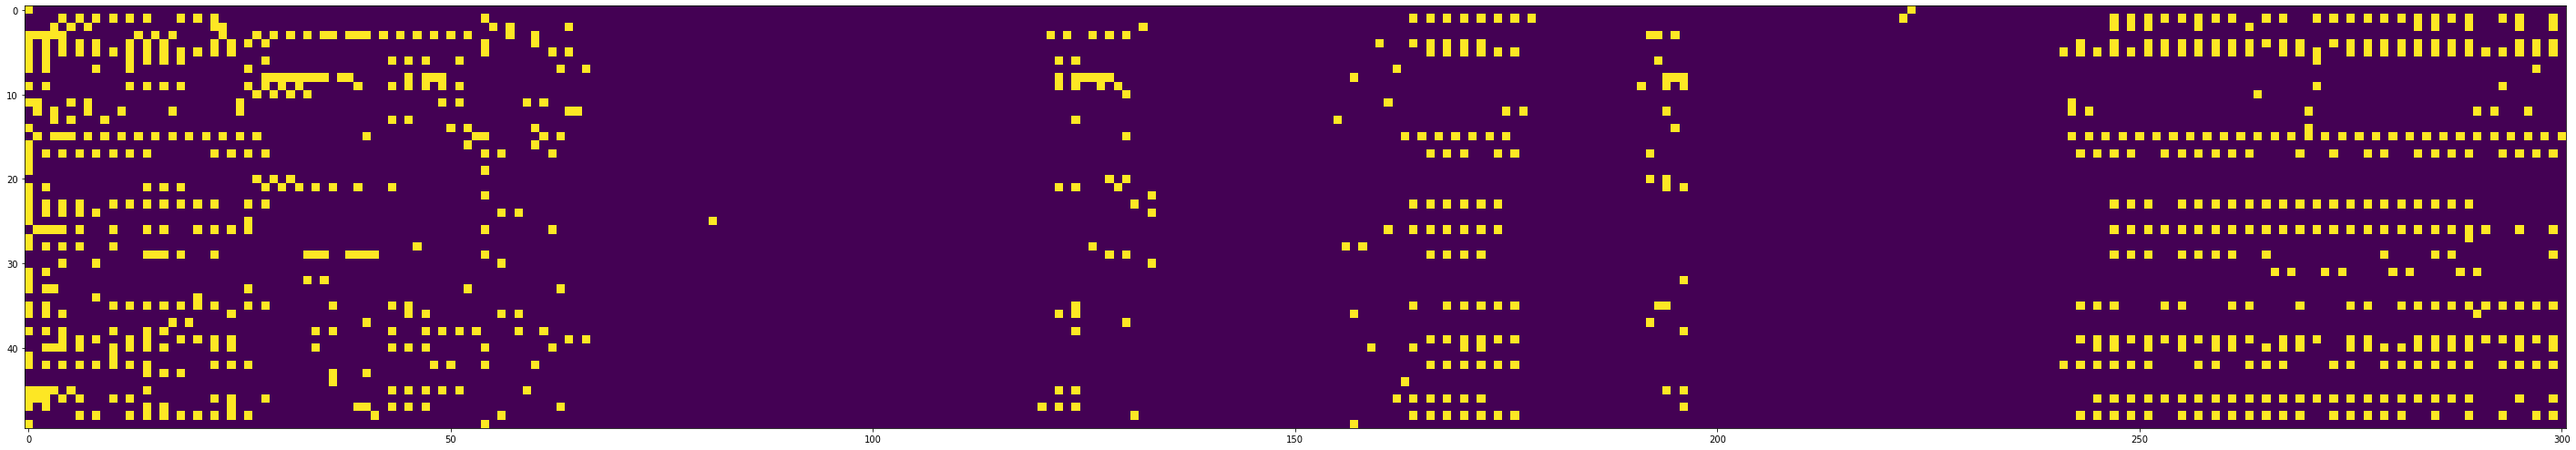

In [2]:
b = brain.Brain(
    num_neurons=50, 
    excitatory_synaptic_density=0.2,
    inhibitory_synaptic_density=0.4,
    neuronal_threshold=1,
    probability_of_random_excitation=0.001,
    initial_active_neuron_density=0.5,
)
b.simulate_brain(
    300,
    with_hebbian_learning=True,
)

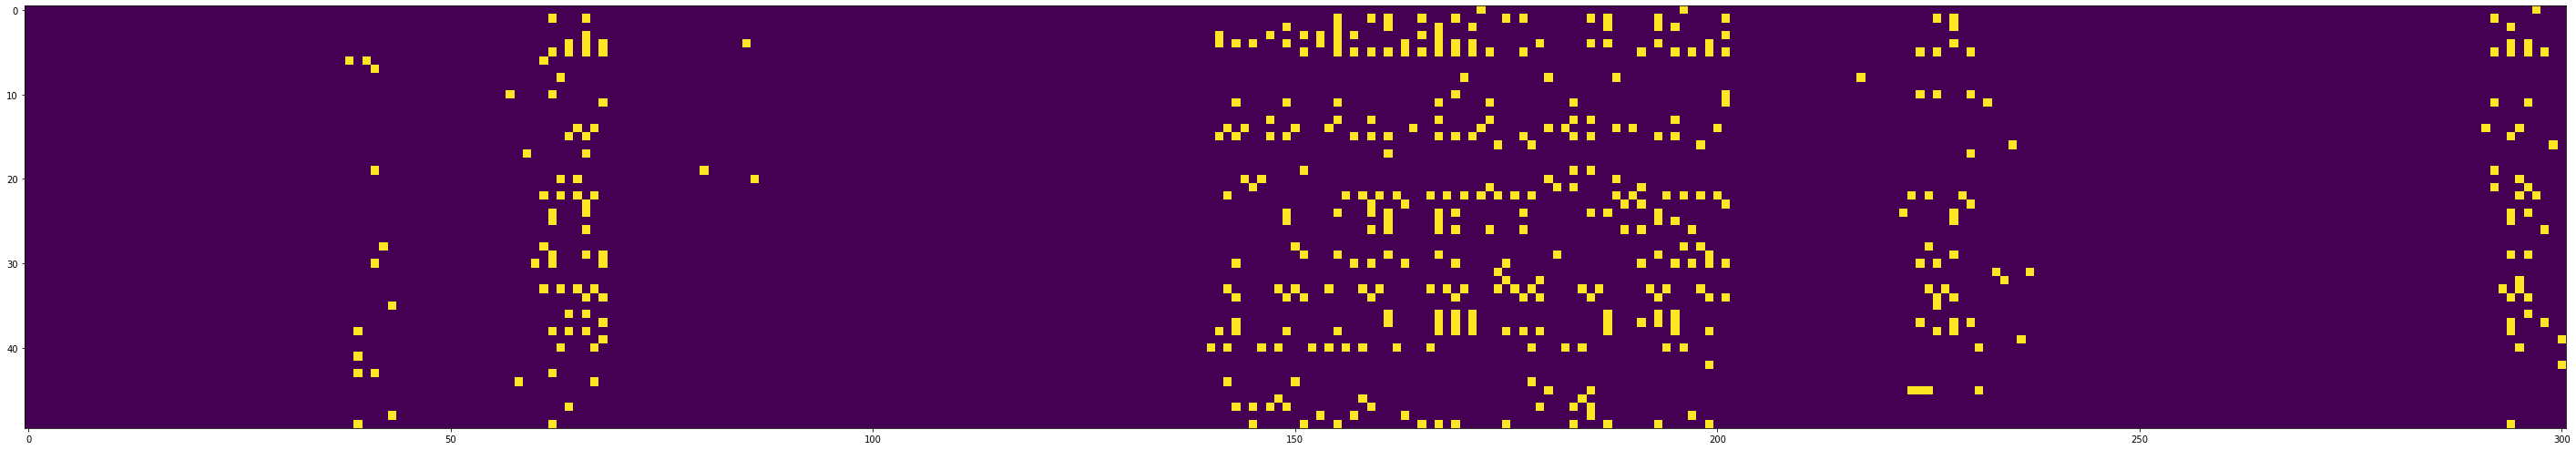

In [139]:
b.simulate_brain(
    300,
    with_hebbian_learning=True,
)

In [639]:
(b.synapses_a / (b.synapses_a + b.synapses_b))

<ipython-input-639-f662ffe867c0>:1: RuntimeWarning: invalid value encountered in true_divide
  (b.synapses_a / (b.synapses_a + b.synapses_b))


array([[0.00184502,        nan, 0.0202952 , ...,        nan, 0.03874539,
               nan],
       [0.00177936, 0.01957295,        nan, ..., 0.00177936,        nan,
               nan],
       [0.99818841, 0.01992754, 0.01992754, ..., 0.00181159, 0.01992754,
        0.00181159],
       ...,
       [0.00181159,        nan, 0.01992754, ..., 0.99818841, 0.05615942,
        0.00181159],
       [0.00181159, 0.03804348, 0.01992754, ..., 0.00181159, 0.99818841,
               nan],
       [0.00181159, 0.98007246, 0.01992754, ...,        nan, 0.05615942,
               nan]])

# next

* get a better plot
* make the activation threshold of the neurons drain as time goes on unless they activate, then they get the max threshold

# ideas
1. represent inhibitory synapses with negative S_a
2. make faster by precalculating `self.synapses > 0` for Hebbian learning
3. make more memory efficient (maybe) by using sparse matrices

In [175]:
x = np.array([[1,2],[3,4]])

In [184]:
x[0,0:1]

array([1])

In [3]:
S = np.random.rand(1000,1000)

In [6]:
%%timeit
np.logical_not(S>0.5)

335 µs ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
np.array([[1,0],[0,1]])*(np.array([[1,2],[3,4]])>2)

array([[0, 0],
       [0, 1]])

In [10]:
import mock

ModuleNotFoundError: No module named 'mock'

In [228]:
import brain; import importlib; importlib.reload(brain);
b = brain.Brain(
        num_neurons=1,
        excitatory_synaptic_density=1,
        inhibitory_synaptic_density=0,
        neuronal_max_threshold=4,
        initial_active_neuron_density=0.5,
    )

In [233]:
b.synapses_a = -9
b.synapses_b = 1

history_length = 10000
history = []
for i in range(history_length):
    history.append(b.get_synaptic_activation())
    
sum(history)/history_length

array([[0.]])

In [493]:
self = brain.Brain(
        num_neurons=1,
        excitatory_synaptic_density=1,
        inhibitory_synaptic_density=0,
        neuronal_max_threshold=4,
        initial_active_neuron_density=0.5,
    )
syn = 0
self.synapses[0,0] = syn
self.synapses_a[0,0] = 9*syn
self.synapses_b[0,0] = 1

# average of beta distributions
synaptic_threshold = self.synapses_a / (np.abs(self.synapses_a) + self.synapses_b)

rands = np.random.rand(self.num_neurons, self.num_neurons)

# if the synapses
synaptic_activations = 1*(rands > (1-synaptic_threshold)) or -1*(-rands < -(1+synaptic_threshold))

print(synaptic_threshold)
print(rands)
print(synaptic_activations)

[[0.]]
[[0.52020867]]
[[0]]


In [49]:
x = np.logical_and(np.array([[True],[True],[False],[False]]), np.array([[True],[False],[True],[False]]))
x

array([[ True],
       [False],
       [False],
       [False]])

In [35]:
x and x

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()